In [ ]:
#pip install pandas numpy seaborn matplotlib klib dtale scikit-learn joblib pandas-profiling sklearn

Problem Statement: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# BigMart-Sales-Analysis-and-Prediction
Hypothesis generation

The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.


In [106]:
##Importing pakages needed to solve the problem

In [48]:
#Loading Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('/content/Train.csv')
df_test=pd.read_csv('/content/Test.csv')


In [3]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
concting=pd.concat([df_train,df_test])
print(concting)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.30          Low Fat         0.016047   
1              DRC01         5.92          Regular         0.019278   
2              FDN15        17.50          Low Fat         0.016760   
3              FDX07        19.20          Regular         0.000000   
4              NCD19         8.93          Low Fat         0.000000   
...              ...          ...              ...              ...   
5676           FDB58        10.50          Regular         0.013496   
5677           FDD47         7.60          Regular         0.142991   
5678           NCO17        10.00          Low Fat         0.073529   
5679           FDJ26        15.30          Regular         0.000000   
5680           FDU37         9.50          Regular         0.104720   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [9]:
#Exploratory Data Analysis
df_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
df_train.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128182         Breads        156.1314  OUT035             2004                       Small        Tier 2                Supermarket Type1  2792.3652            1
FDV25            5.905        low fat           0.045614         Canned        221.5456  OUT013             1987                       High         Tier 3                Supermarket Type1  6852.4136            1
                              Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Medium       Tier 3   

In [11]:
df_train.shape

(8523, 12)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [14]:
#check unique values in dataset
df_train.apply(lambda x:len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [15]:
#handling missing value of train data
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
#replacing null value in numerical columns using median
median=df_train["Item_Weight"].median()
df_train["Item_Weight"].replace(np.nan,median,inplace=True)

In [17]:
mode=df_train["Outlet_Size"].mode().values[0]
df_train["Outlet_Size"]=df_train["Outlet_Size"].replace(np.nan,mode)

In [18]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
mean=df_train["Item_Visibility"].mean()
df_train["Item_Visibility"].replace(np.nan,mean,inplace=True)

In [21]:
df_train["Item_Weight"].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [22]:
df_train["Outlet_Size"].describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

In [23]:
duplicate=df_train.duplicated()
print(duplicate.sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool>


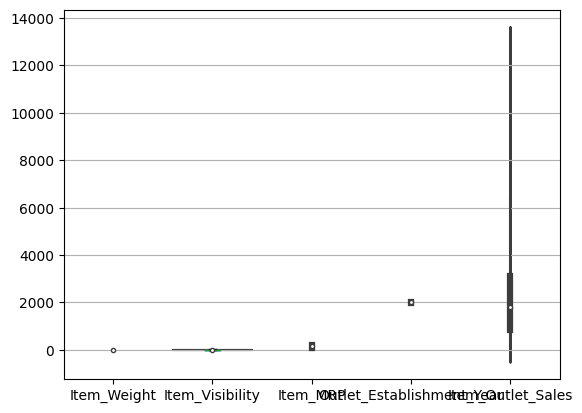

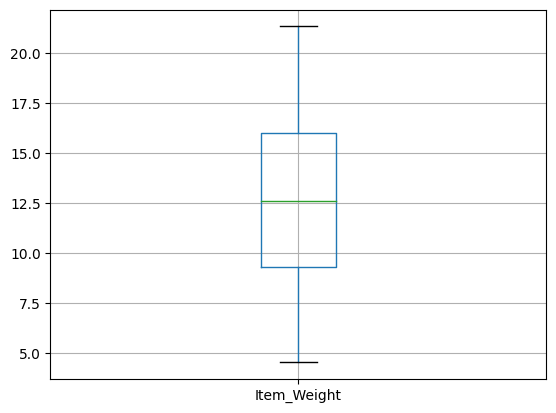

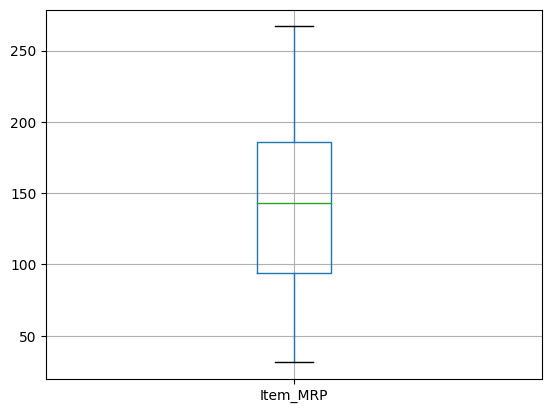

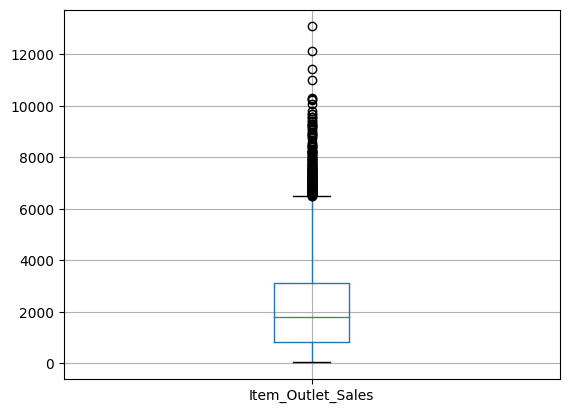

In [24]:
#Univariate Analysis
df_train.boxplot(column=['Item_Weight'])
sns.violinplot(column=['Item_MRP'],data=df_train)
plt.show()

df_train.boxplot(column=['Item_Weight'])
plt.show()
df_train.boxplot(column=['Item_MRP'])
plt.show()
df_train.boxplot(column=['Item_Outlet_Sales'])
plt.show()

(array([5577.,    0.,    0.,  928.,    0.,    0., 1083.,    0.,    0.,
         935.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

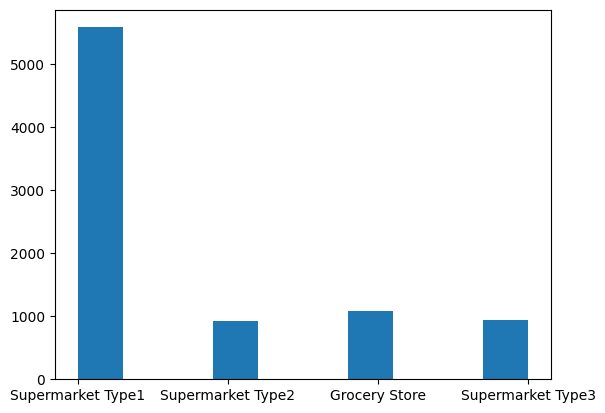

In [25]:
plt.hist(df_train['Outlet_Type'])

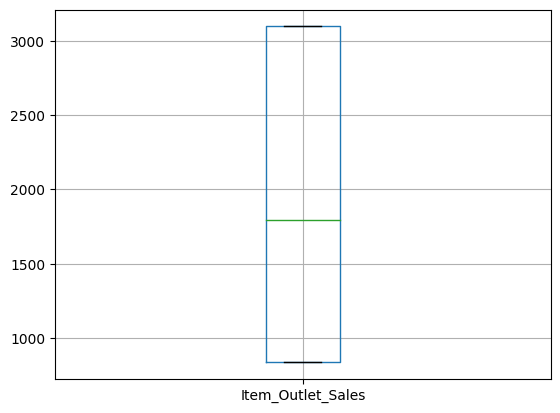

In [26]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    lower_range=q1-(1.5 * 0.25)
    upper_range=q3-(1.5 *0.75)
    return lower_range,upper_range
lowsales,uppsales=remove_outlier(concting['Item_Outlet_Sales'])
df_train['Item_Outlet_Sales']=np.where(df_train['Item_Outlet_Sales']>uppsales,uppsales,df_train['Item_Outlet_Sales'])
df_train['Item_Outlet_Sales']=np.where(df_train['Item_Outlet_Sales']<lowsales,lowsales,df_train['Item_Outlet_Sales'])
df_train.boxplot(column=['Item_Outlet_Sales'])
plt.show()

Text(0, 0.5, 'Item_Outlet_Sales')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


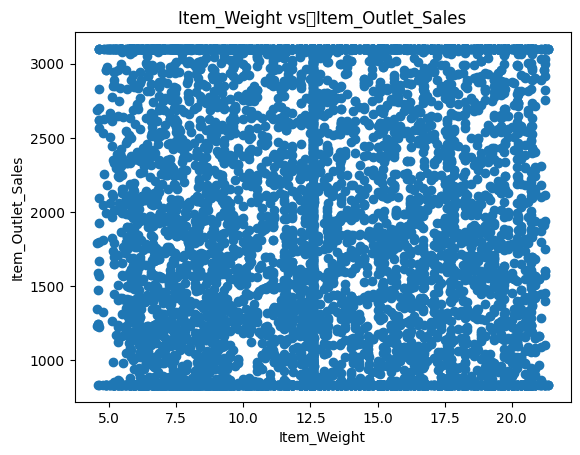

In [27]:
#Bivariet analysis
import matplotlib.pyplot as plt

#create scatterplot of 
plt.scatter(df_train.Item_Weight,df_train.Item_Outlet_Sales)
plt.title('Item_Weight vs	Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')

Text(0.5, 1.0, 'Item_Weight and Item_Outlet_Sales')

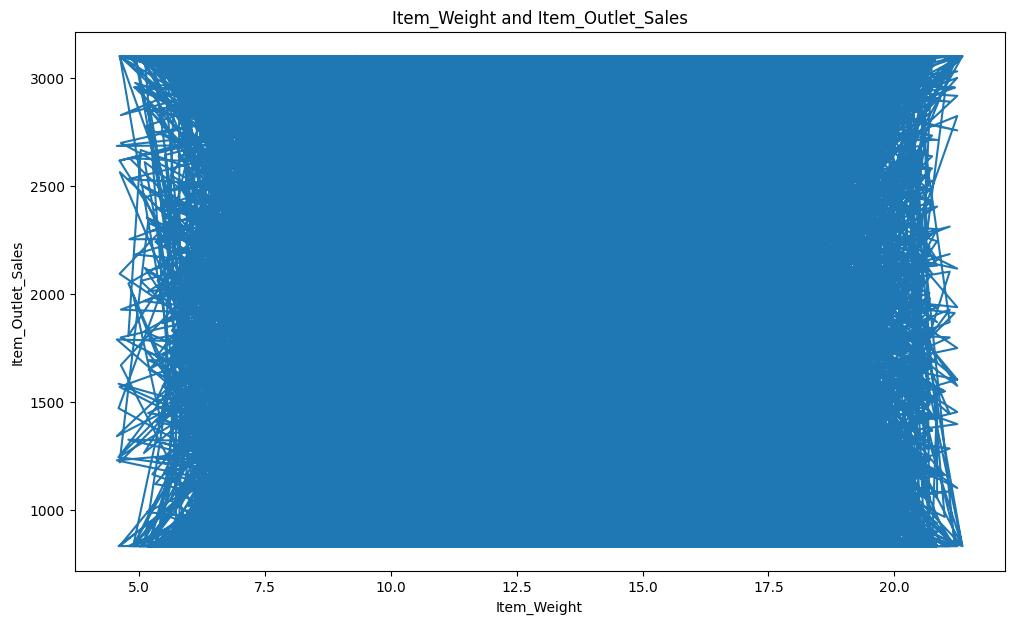

In [28]:
plt.figure(figsize=(12,7))
plt.plot(df_train.Item_Weight,df_train.Item_Outlet_Sales)
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales")

In [29]:
df_train.corr()

<ipython-input-29-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.016366
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.136462
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.559866
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.003603
Item_Outlet_Sales,0.016366,-0.136462,0.559866,-0.003603,1.000000


<ipython-input-30-12832c6ba8bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


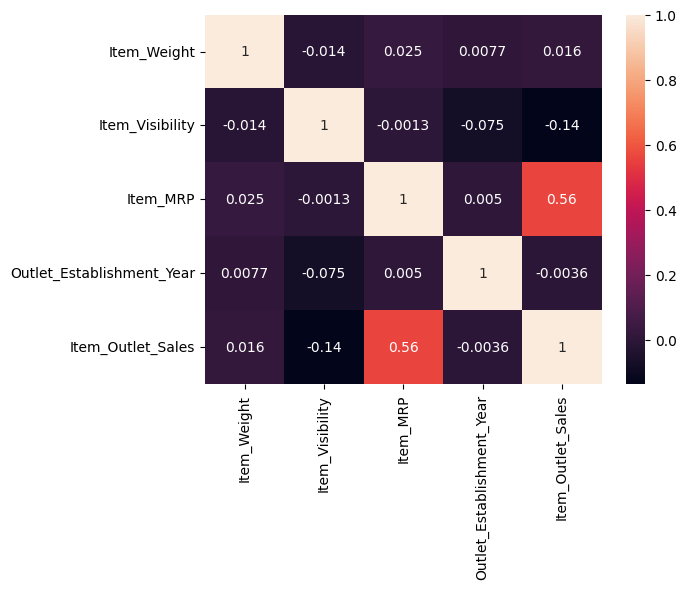

In [30]:
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [31]:
#Feature Engineering
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [32]:
df_train['Item_Fat_Content']= df_train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [33]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_train['Outlet']=le.fit_transform(df_train['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for col in cat_col:
    df_train[col]=le.fit_transform(df_train[col])

In [34]:
#one hot encoding
df_train=pd.get_dummies(df_train,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
df_train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3100.1714,9,1,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,833.8724,3,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,9,1,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,6,182.0950,OUT010,1998,833.8724,0,0,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,9,53.8614,OUT013,1987,994.7052,1,1,...,1,0,0,0,0,1,0,1,0,0


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
df_train=df_train.apply(le.fit_transform)

In [37]:
df_train

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,156,284,664,4,5592,9,4,1480,9,1,...,0,1,0,1,0,0,0,1,0,0
1,8,57,880,14,473,3,8,0,3,0,...,0,1,0,0,0,1,0,0,1,0
2,662,375,715,10,2901,9,4,890,9,1,...,0,1,0,1,0,0,0,1,0,0
3,1121,392,0,6,4227,0,3,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,1297,265,0,9,627,1,1,116,1,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,125,3912,13,4955,1,1,1298,1,1,...,1,0,0,0,0,1,0,1,0,0
8519,897,233,3278,0,2023,7,5,0,7,0,...,0,1,0,0,1,0,0,1,0,0
8520,1357,299,2302,8,1263,6,6,269,6,1,...,0,0,1,0,1,0,0,1,0,0
8521,681,149,7175,13,1857,3,8,717,3,0,...,0,1,0,0,0,1,0,0,1,0


In [59]:
X = df_train.drop(columns='Item_Outlet_Sales', axis=1)
Y = df_train['Item_Outlet_Sales']
print(x)
print(y)

      Item_Weight  Item_Visibility  Item_Type  Item_MRP  Outlet  \
0             284              664          4      5592       9   
1              57              880         14       473       3   
2             375              715         10      2901       9   
3             392                0          6      4227       0   
4             265                0          9       627       1   
...           ...              ...        ...       ...     ...   
8518          125             3912         13      4955       1   
8519          233             3278          0      2023       7   
8520          299             2302          8      1263       6   
8521          149             7175         13      1857       3   
8522          346             3108         14      1011       8   

      Item_Fat_Content_0  Item_Fat_Content_1  Outlet_Size_0  Outlet_Size_1  \
0                      1                   0              0              1   
1                      0               

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [61]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 17) (6818, 17) (1705, 17)


In [62]:
#Machine Learning Model Training:

#Linear Regression


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [65]:
regressor = LinearRegression()

In [66]:
regressor.fit(x,y)

LinearRegression()

In [67]:
training_data_prediction = regressor.predict(x)

In [68]:
r2_train = r2_score(y, training_data_prediction)

In [69]:
print('R Squared value = ', r2_train)

R Squared value =  0.5587471576388569


In [70]:
test_data_prediction = regressor.predict(x_test)

In [71]:
r2_test = r2_score(y_test, test_data_prediction)

In [72]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.5464846995247155


In [73]:
#Regularized Linear Regression

#Lasso

In [74]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
regressor = Lasso(alpha=0.1)
regressor.fit(x_train, y_train)

Lasso(alpha=0.1)

In [75]:
#prediction on training data
training_data_prediction = regressor.predict(x_train)

In [76]:
r2_train = r2_score(y_train, training_data_prediction)

In [77]:
print('R Squared value = ', r2_train)

R Squared value =  0.5619423310222933


In [78]:
test_data_prediction = regressor.predict(x_test)

In [79]:
r2_test = r2_score(y_test, test_data_prediction)

In [80]:
print('R Squared value = ', r2_test)

R Squared value =  0.5448271750692868


In [81]:
#Ridge

In [82]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Create and train the Lasso regression model
regressor = Ridge(alpha=0.1)
regressor.fit(x_train, y_train)

Ridge(alpha=0.1)

In [83]:
training_data_prediction = regressor.predict(x_train)

In [84]:
r2_train = r2_score(y_train, training_data_prediction)

In [85]:
print('R Squared value = ', r2_train)

R Squared value =  0.561948544264644


In [86]:
test_data_prediction = regressor.predict(x_test)

In [87]:
r2_test = r2_score(y_test, test_data_prediction)

In [88]:
print('R Squared value = ', r2_test)

R Squared value =  0.544887356837557


In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [90]:
# prediction on training data
training_data_prediction = regressor.predict(x_train)

In [91]:
r2_train =r2_score(y_train, training_data_prediction)

In [92]:
print('R Squared value = ', r2_train)

R Squared value =  0.9411082370236302


In [93]:
test_data_prediction = regressor.predict(x_test)

In [94]:
r2_test = r2_score(y_test, test_data_prediction)

In [95]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.5606133009640122


In [96]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [97]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [98]:
training_data_prediction = regressor.predict(x_train)

In [99]:
r2_train = r2_score(y_train, training_data_prediction)

In [100]:
print('R Squared value = ', r2_train)

R Squared value =  0.8563399750598861


In [101]:
test_data_prediction = regressor.predict(x_test)

In [102]:
r2_test = r2_score(y_test, test_data_prediction)

In [103]:
print('R·Squared·value·=',r2_test)

R·Squared·value·= 0.5593448202144262


SUMMARY

The goal of this data science project is to develop a predictive model to estimate the sales of each product at a specific store.The project involes collecting and analyzing historical sales data for each product at the store,as well as other relevant data such as customer demographics,promotional activities,seasonal trends.
After cleaning and pre-processing the data,various macine learning algorithms is able to apply to build a predictive model.firstly trained the model then evaluated on test data set to assess its accuracy.
  Once the model is developed and validated.this information can be valuable for inventory management,sales forcasting,and decision making related to promotional activities. 

#The accuracy of all models using different machine learning algorithms
    
             Linear regression
    R Squared value =  0.5587471576388569
                IT is low
             Random Forest Regression
      
    R·Squared·value·= 0.5606133009640122
              
              XGBRegression
    R·Squared·value·= 0.5593448202144262
 Among all the models Random Forest Regression gave the best Accuracy  0.5606133009640122             
          
           